In [1]:
from matplotlib import pyplot as plt
import soundfile as sf
import librosa.feature
import numpy as np
import scipy as sc
import torchaudio
import librosa
import torch

[Text(0.5, 1.0, 'STFT output spectrogram')]

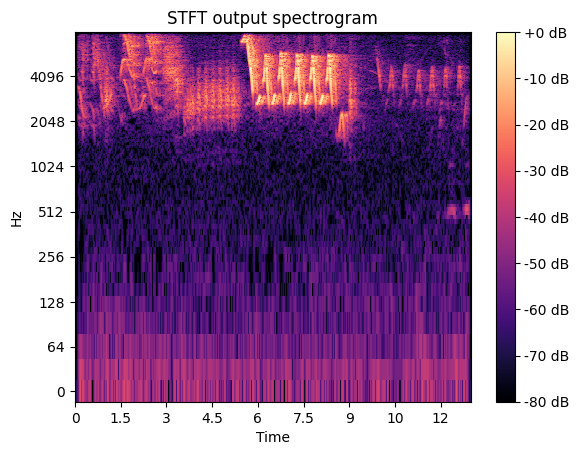

In [3]:
# Place your code for this part here
BIRDSING_FILEPATH = 'audio_16k/bird-sing.wav'
data, samplerate = sf.read(BIRDSING_FILEPATH)

stft_output = librosa.stft(data, n_fft=512)

amplitude_output = np.abs(stft_output)
db = librosa.amplitude_to_db(amplitude_output, ref=np.max)

fig, ax = plt.subplots()

img = librosa.display.specshow(db, sr=samplerate,
                               y_axis='log', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT output spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

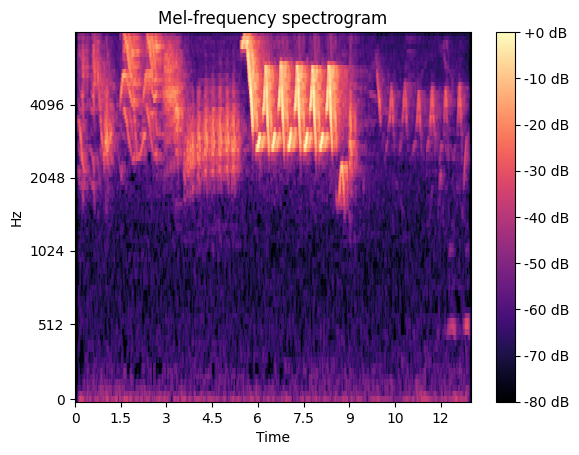

In [4]:
log_mel_output = librosa.feature.melspectrogram(y=data, sr=samplerate, n_fft=512, hop_length=128, n_mels=80)
db = librosa.power_to_db(log_mel_output, ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(db, x_axis='time',
                               y_axis='mel', sr=samplerate, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

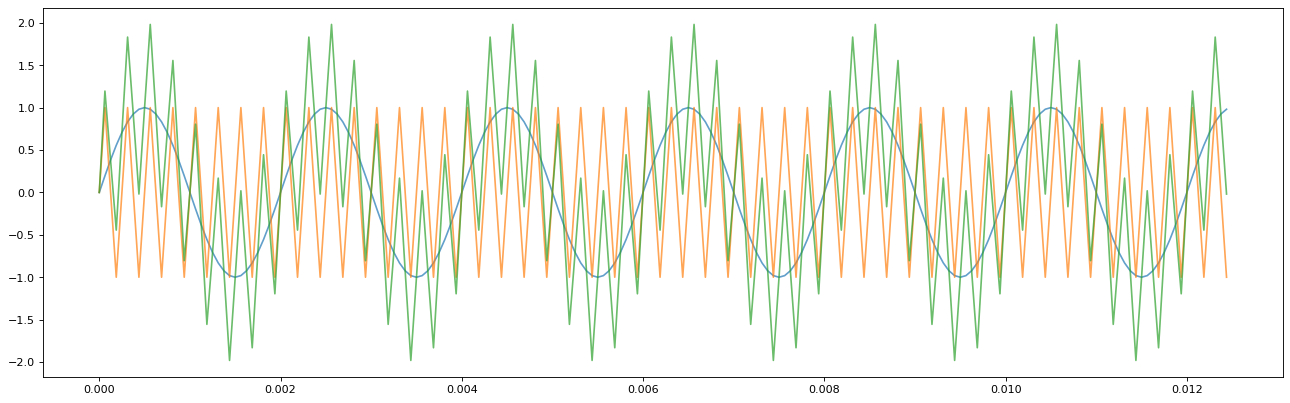

In [5]:
# Place your code for this part here
start_time = 0
end_time = 3
sample_rate = 16000
time = np.arange(start_time, end_time, 1/sample_rate)
frequency = 500
sinewave_500 = np.sin(2 * np.pi * frequency * time)

frequency = 4000
sinewave_4k = np.sin(2 * np.pi * frequency * time)

plt.figure(figsize=(20, 6), dpi=80)
plt.plot(time[:200], sinewave_500[:200], alpha=0.7)
plt.plot(time[:200], sinewave_4k[:200], alpha=0.7)
plt.plot(time[:200], sinewave_500[:200] + sinewave_4k[:200], alpha=0.7)

(0.0, 8000.0, -28799999.999999985, 604799999.9999996)

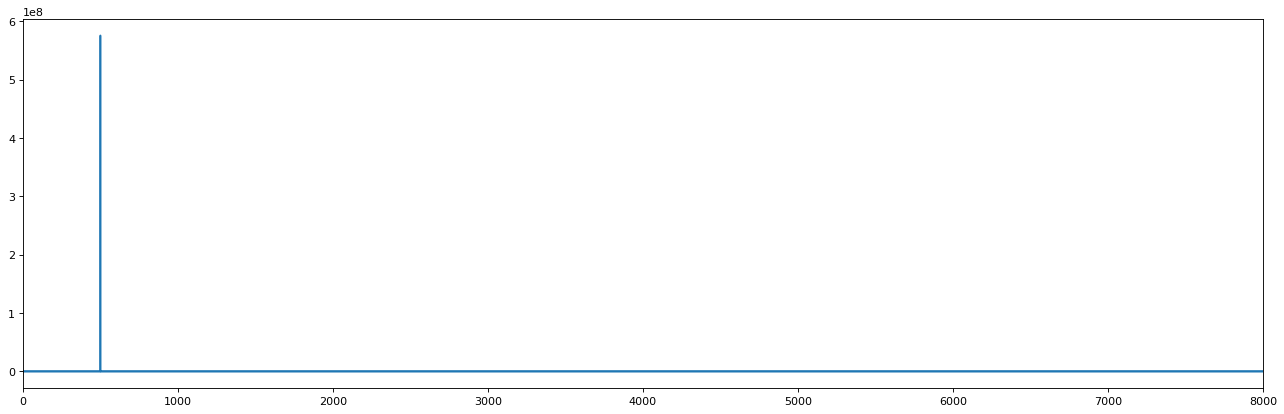

In [6]:
sinewave_fft = np.fft.fft(sinewave_500)
freq = np.fft.fftfreq(time.shape[-1], d=1/sample_rate)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(freq, sinewave_fft.real**2 + sinewave_fft.imag**2)
plt.axis(xmin=0, xmax=8000)

(0.0, 8000.0, -28800000.0, 604800000.0)

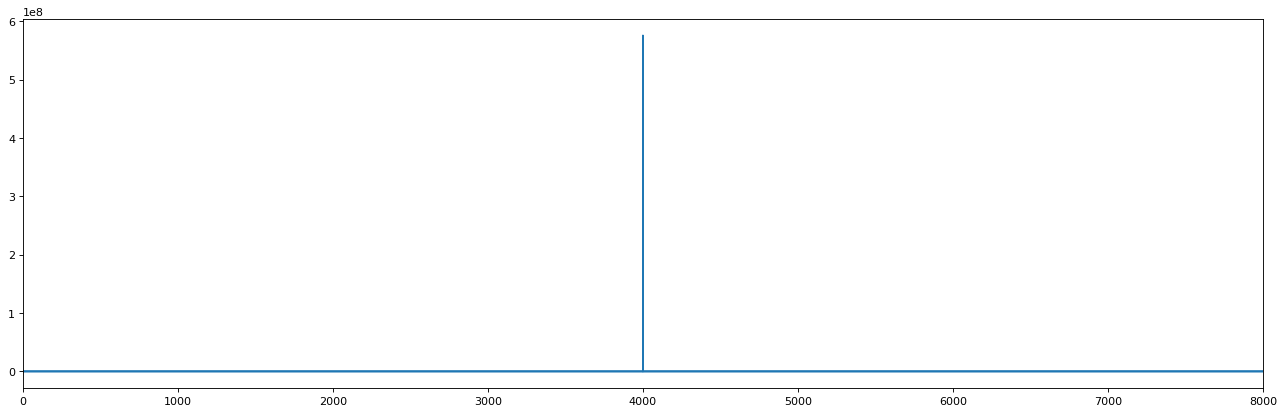

In [7]:
sinewave_fft = np.fft.fft(sinewave_4k)
freq = np.fft.fftfreq(time.shape[-1], d=1/sample_rate)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(freq, sinewave_fft.real**2 + sinewave_fft.imag**2)
plt.axis(xmin=0, xmax=8000)

(0.0, 8000.0, -28799999.999999996, 604799999.9999999)

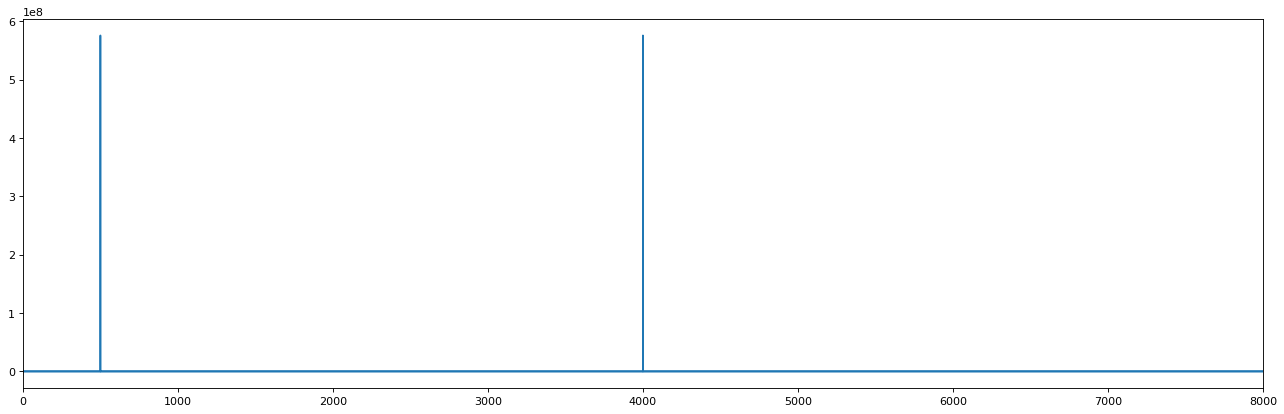

In [8]:
sinewave_fft = np.fft.fft(sinewave_500 + sinewave_4k)
freq = np.fft.fftfreq(time.shape[-1], d=1/sample_rate)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(freq, sinewave_fft.real**2 + sinewave_fft.imag**2)
plt.axis(xmin=0, xmax=8000)

In [9]:
# Place your code for this part here
def resample(signal, new_fs, old_fs):
  transform = torchaudio.transforms.Resample(orig_freq=old_fs, new_freq=new_fs).double()
  return transform(torch.from_numpy(signal))


In [10]:
# Place your code for this part here
start_time = 0
end_time = 3
sample_rate = 32000
time = np.arange(start_time, end_time, 1/sample_rate)

sum_of_waves = np.zeros(time.shape)
base_frequency = 1000
shift_frequency = -1000
for i in range(1, 5):
  sum_of_waves += np.sin(2 * np.pi * ((2**i) * base_frequency + shift_frequency) * time)

sum_of_waves_16k = resample(sum_of_waves, 16000, sample_rate).numpy()
sum_of_waves_8k = resample(sum_of_waves, 8000, sample_rate).numpy()
sum_of_waves_resampled_16k = resample(sum_of_waves_16k, sample_rate, 16000)
sum_of_waves_resampled_8k = resample(sum_of_waves_8k, sample_rate, 8000)
sinewave_fft = np.fft.fft(sum_of_waves)
sinewave_fft_resampled_16k = np.fft.fft(sum_of_waves_resampled_16k)
sinewave_fft_resampled_8k = np.fft.fft(sum_of_waves_resampled_8k)
freq = np.fft.fftfreq(time.shape[-1], d=1/sample_rate)


(0.0, 16000.0, -115200000.00000119, 2419200000.000025)

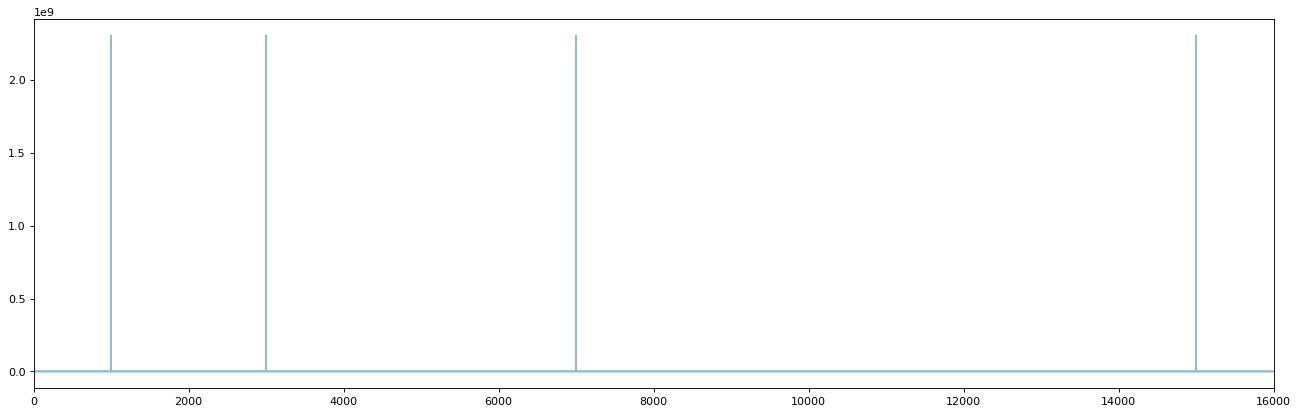

In [11]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(freq, sinewave_fft.real**2 + sinewave_fft.imag**2, alpha=0.5)
plt.axis(xmin=0, xmax=16000)

(0.0, 16000.0, -115430381.08555081, 2424038004.831675)

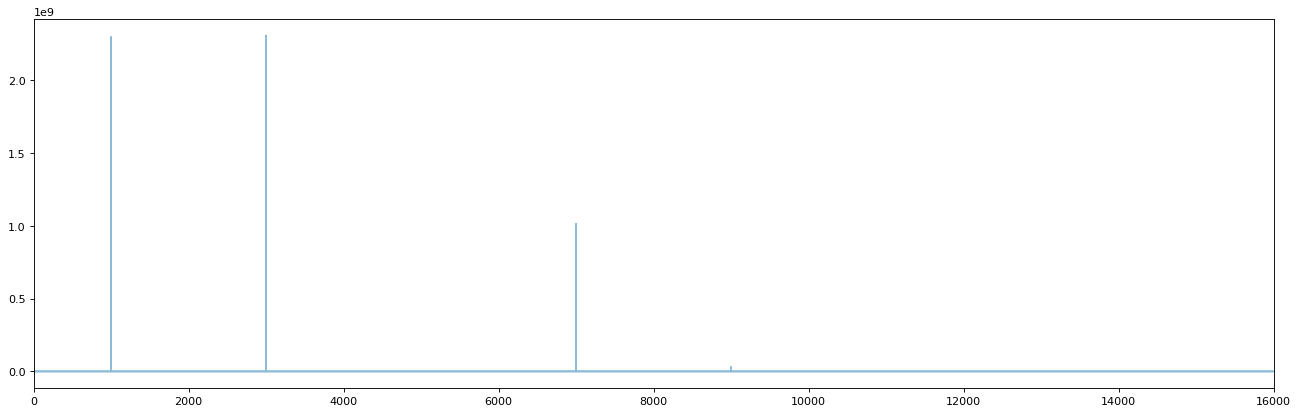

In [12]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(freq, sinewave_fft_resampled_16k.real**2 + sinewave_fft_resampled_16k.imag**2, alpha=0.5)
plt.axis(xmin=0, xmax=16000)

(0.0, 16000.0, -115245571.71410118, 2420157008.094872)

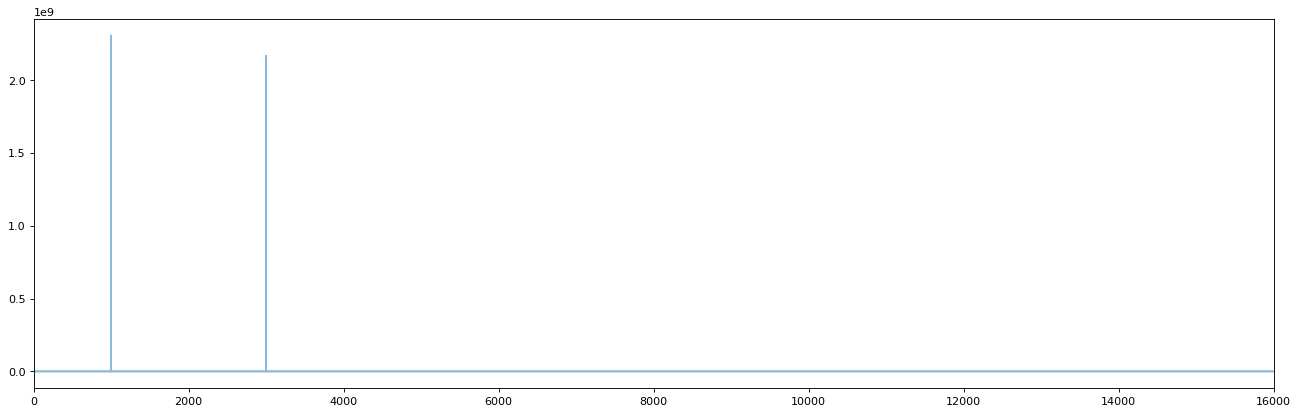

In [13]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(freq, sinewave_fft_resampled_8k.real**2 + sinewave_fft_resampled_8k.imag**2, alpha=0.5)
plt.axis(xmin=0, xmax=16000)

In [14]:
def find_peaks_from_audiofiles(data, samplerate):
  data_fft = np.fft.fft(data)
  freq = np.fft.fftfreq(data_fft.shape[-1], d=1/samplerate)
  
  data_amplitude = data_fft.real**2 + data_fft.imag**2
  frequencies_peaks, _ = sc.signal.find_peaks(data_amplitude)
  filtered_peaks = frequencies_peaks[data_amplitude[frequencies_peaks] > 1000]
  filtered_amplitudes = data_amplitude[frequencies_peaks[data_amplitude[frequencies_peaks] > 1000]]

  return freq, data_amplitude, filtered_peaks, filtered_amplitudes

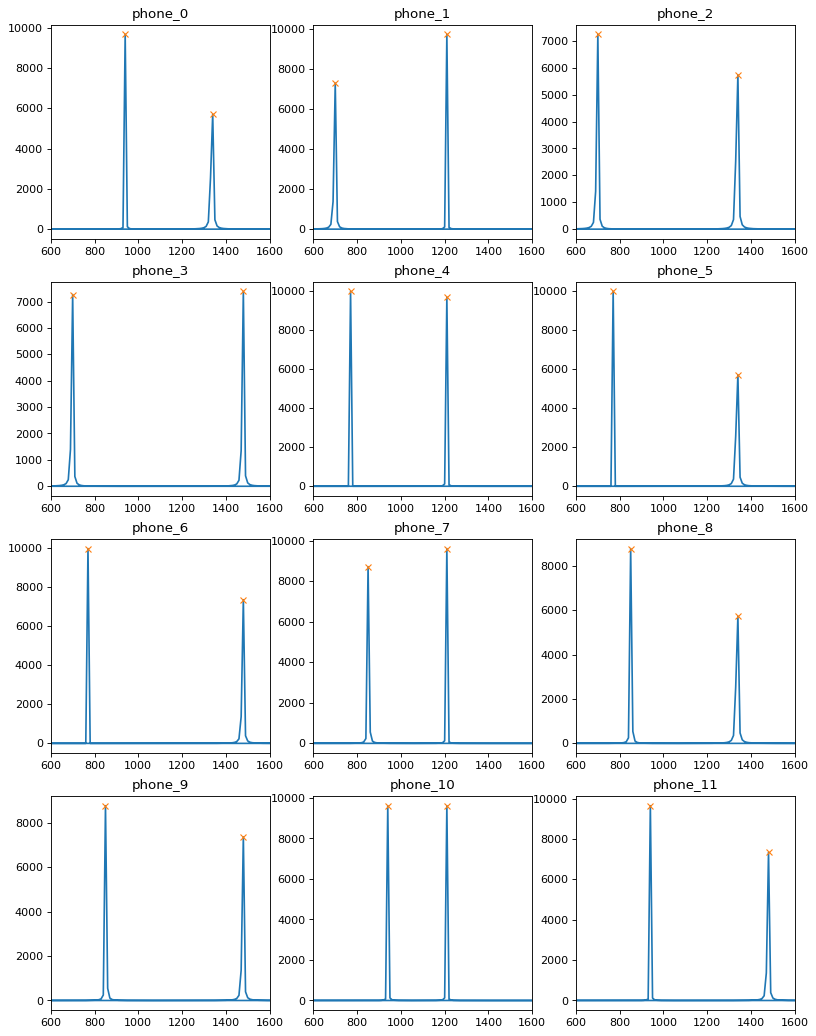

In [15]:
# Place your code for this part here
plt.figure(figsize=(12, 16), dpi=80)
peaks = np.zeros((12, 4))
for i in range(12):
  digit_filepath = f'phone_digits_8k/phone_{i}.wav'
  data, samplerate = sf.read(digit_filepath)
  freq, data_amplitude, filtered_peaks, filtered_amplitudes = find_peaks_from_audiofiles(data, samplerate)

  peaks[i, :] = freq[filtered_peaks]
  
  plt.subplot(4, 3, i+1)
  plt.plot(freq, data_amplitude)
  plt.plot(freq[filtered_peaks], filtered_amplitudes, 'x')
  plt.axis(xmin=600, xmax=1600)
  plt.title(f'phone_{i}')


In [16]:
def classify_digit(data, samplerate):
  freq, data_amplitude, filtered_peaks, filtered_amplitudes = find_peaks_from_audiofiles(data, samplerate)

  differences = np.abs(peaks - freq[filtered_peaks])
  digit = np.argmin(differences.sum(axis=1))
  return digit

In [17]:
filepath = 'phone_digits_8k/phone_9.wav'
data, samplerate = sf.read(filepath)

print(f'The digit of the input sound is: {classify_digit(data, samplerate)}')


The digit of the input sound is: 9
